# Instructions

Implementation of this code is deliberately simple.  As long as you have the lsst.MAG and lsst.MASS tables (available on this page) in the code directory, just create an array representing log(M/Msun), create an instance of a Dwarfs() class object using that array as input, then create a tuple of coordinate arrays in the form (RA, DEC).  The `__init__` is constructed such that Sersic parameters and other features are attached as attributes of the Dwarfs() class object on creation of an instance.

Some helper functions are available to create mass and coordinate arrays.  These will be expanded upon as the code develops.

NOTE: make sure you have the lsst.MAG and lsst.MASS tables in the repository directory!

In [1]:
import makeDwarfs as md
import numpy as np
import matplotlib.pyplot as plt

logmstar = np.arange(5, 10.1, 0.1) # Array of stellar mass values to use (log(M/Msun))
logm = md.mass_from_schechter(logmstar, N=2000, phi_star=100) # Drawing from Schechter function
# CAUTION: above may result in probability = 0 for some masses depending on Schechter parameter choices, 
# throwing the following error: "ValueError: probabilities contain NaN"

dwarfs = md.Dwarfs(logm)

# Picking a random index and looking at the values of some attributes
i = np.random.randint(0, len(logm))
print('log(M)={:.1f}, Reff (pc)={:.3f}, n={:.3f}'.format(dwarfs.mstar[i], dwarfs.re[i], dwarfs.n[i]))
print('M_g={:.3f}, M_r={:.3f}, M_i={:.3f}'.format(dwarfs.mabs['gmagVar'][i], 
                                                  dwarfs.mabs['rmagVar'][i], 
                                                  dwarfs.mabs['imagVar'][i]))

log(M)=7.4, Reff (pc)=886.610, n=1.104
M_g=-12.561, M_r=-13.056, M_i=-13.336


Text(0.5, 0, '$\\log(M_{*}/M_{\\odot})$')

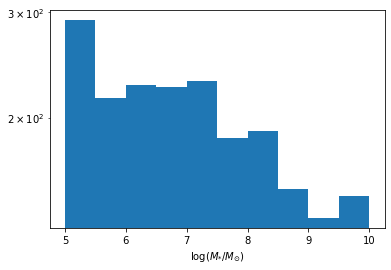

In [2]:
plt.hist(logm)
plt.yscale('log')
plt.xlabel(r'$\log(M_{*}/M_{\odot})$')

Now generate some randomized coordinates for your dwarf galaxy population.

Text(0, 0.5, 'Dec')

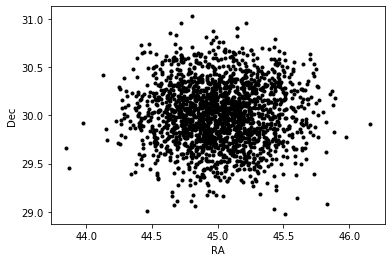

In [3]:
coords = md.distribute_coords_as_gaussian(45, 30, 0.1, 0.1, size=len(logm))
plt.plot(coords[0], coords[1], 'k.')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

Then, one can write out a FITS table with the appropriate headers using the write_to_table function.

In [4]:
md.write_to_table(dwarfs, coords, 'table.fits')

File written as ./table.fits
